## Extra-Trees(Extremely Randomized Trees) Ensemble

* Random Forest is built upon Decision Tree.
* Decision Tree Node splitting is based on gini or entropy or some other algorithims.
* Extra-Trees make use of random thresholds for each feature unlike Decision Tree.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = sns.load_dataset('titanic')

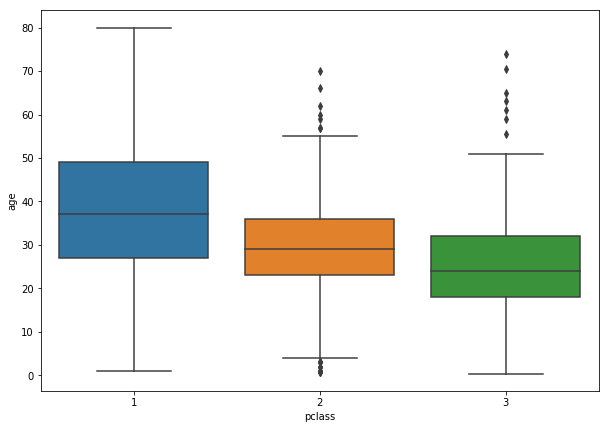

In [4]:
plt.figure(figsize=(10,7))
sns.boxplot(x='pclass',y='age',data=df)

In [5]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [6]:
df['age'] = df[['age','pclass']].apply(impute_age, axis=1)

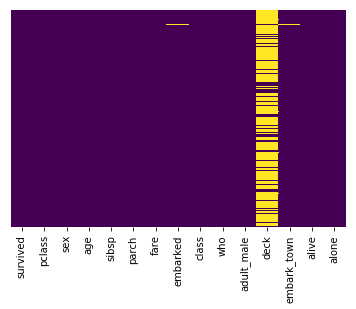

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.drop('deck', axis=1, inplace=True)

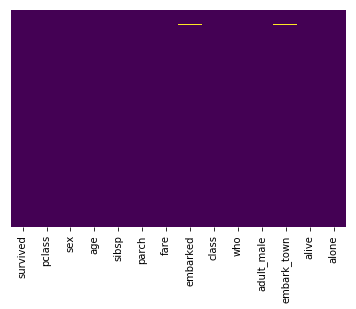

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.dropna(inplace=True)

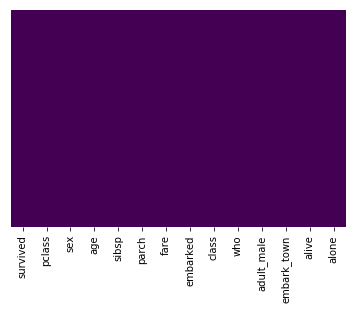

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
X = df[['pclass', 'sex', 'age']]
X['sex'] = pd.get_dummies(df['sex'],drop_first=True)
y = df['survived']

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
X.shape

(889, 3)

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

In [15]:
xt_clf = ExtraTreesClassifier(random_state=42)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
xt_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [19]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))  

In [21]:
print_score(xt_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.8810

Classification Report: 
              precision    recall  f1-score   support

          0       0.86      0.96      0.91       382
          1       0.92      0.76      0.83       240

avg / total       0.88      0.88      0.88       622


Confusion Matrix: 
 [[365  17]
 [ 57 183]]

Average Accuracy: 	 0.8054
Accuracy SD: 		 0.0321


In [22]:
print_score(xt_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8165

Classification Report: 
              precision    recall  f1-score   support

          0       0.82      0.91      0.86       167
          1       0.81      0.66      0.73       100

avg / total       0.82      0.82      0.81       267


Confusion Matrix: 
 [[152  15]
 [ 34  66]]

